# Doublet Singularity and Doublet in Uniform Flow

## Doublet

In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [3]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = (- strength / (2 * math.pi) * 
         ((X - xd)**2 - (Y - yd)**2) / 
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) * 
         2 * (X - xd) * (Y - yd) / 
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [5]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = get_stream_function_doublet(kappa,  x_doublet, y_doublet, X, Y)

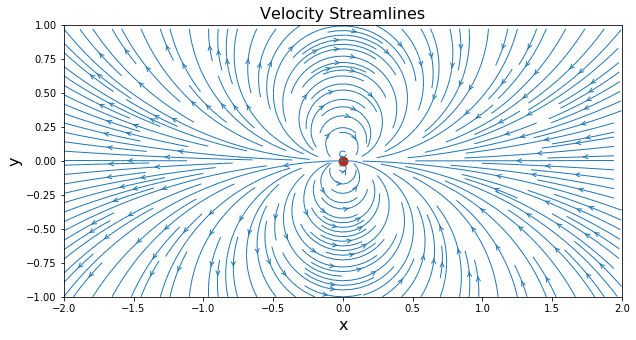

In [6]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Streamlines', fontsize = 16)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

## Velocity Potential

<Figure size 432x288 with 0 Axes>

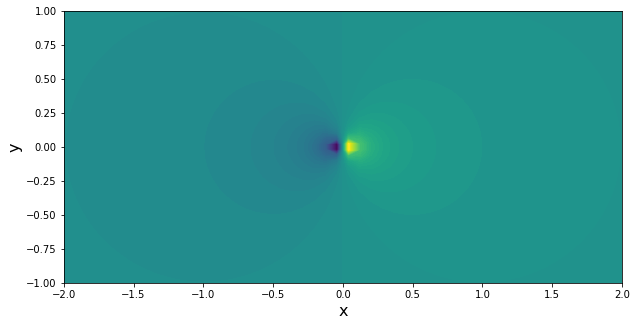

In [7]:
phi = (kappa / (2 * math.pi)) * (X / (X**2 + Y**2))

%run ezPlot.py
ezContourf(X, Y, phi, 100, x_start, y_start, x_end, y_end)

## Doublet in Uniform Flow

In [8]:
u_inf = 1.0

In [9]:
u_freestream = u_inf * numpy.ones((N, N), dtype = float)
v_freestream = numpy.zeros((N, N), dtype = float)

psi_freestream = u_inf * Y

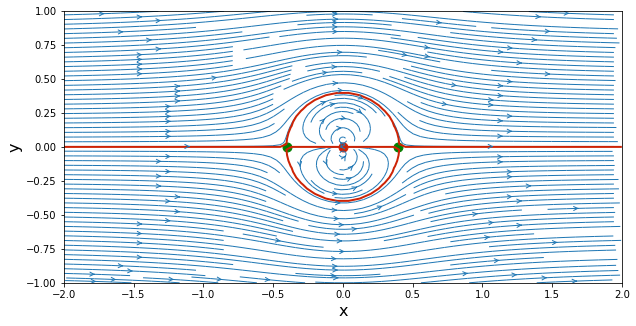

In [10]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], 
               color = 'g', s = 80, marker = 'o');

## New Doublet

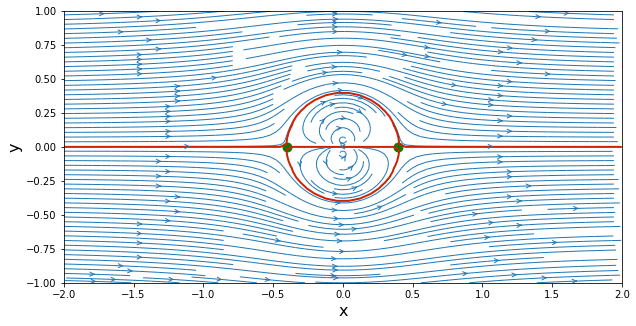

In [22]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_stream_function_doublet(kappa,  x_doublet, y_doublet, X, Y)

u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype = float)
v_freestream = numpy.zeros((N, N), dtype = float)

psi_freestream = u_inf * Y

u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

ezStreamline(X, Y, u, v, x_start, y_start, x_end, y_end)
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], 
               color = 'g', s = 80, marker = 'o');

## Bernoulli's Equation and the Pressure Coefficient

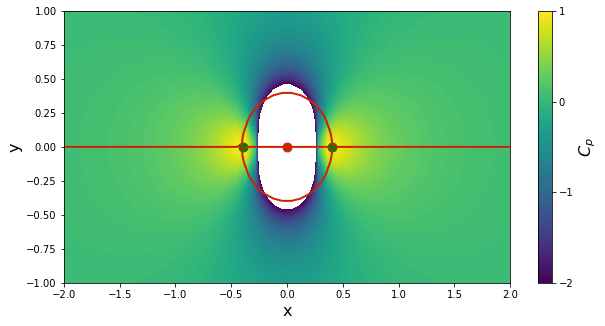

In [24]:
cp = 1.0 - (u**2 + +v**2) / u_inf**2

contf = ezContourf(X, Y, cp, numpy.linspace(-2.0, 1.0, 100), x_start, y_start, x_end, y_end)
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');